In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("Loan_default.csv")

In [27]:
df.shape

(255347, 18)

In [28]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [30]:
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("No missing values found!")

No missing values found!


In [31]:
df['Default'].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

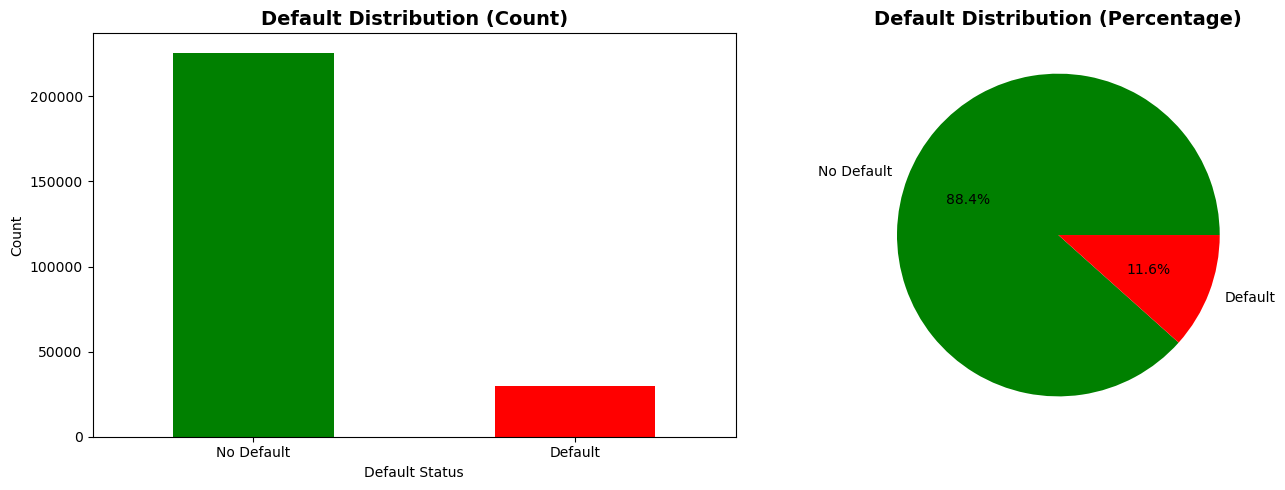

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
df['Default'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Default Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Default Status')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['No Default', 'Default'], rotation=0)

df['Default'].value_counts(normalize=True).plot(kind='pie', ax=axes[1], 
                                                 autopct='%1.1f%%', 
                                                 colors=['green', 'red'],
                                                 labels=['No Default', 'Default'])
axes[1].set_title('Default Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')
plt.tight_layout()

In [33]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'],
      dtype='object')

In [34]:
cat_cols = df.select_dtypes(include=["object"]).columns
cat_cols


Index(['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

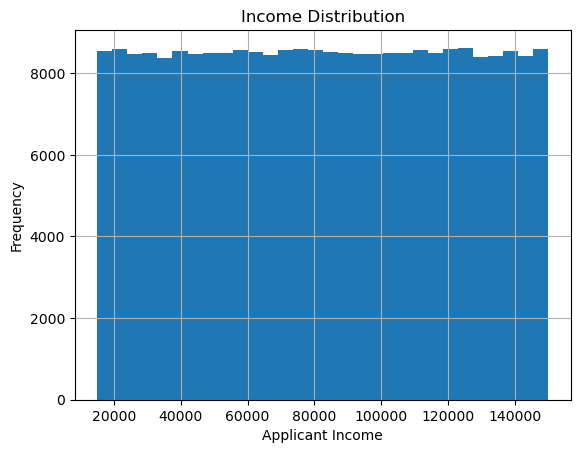

In [35]:
df["Income"].hist(bins=30)
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.title("Income Distribution")
plt.show()


In [36]:
df.groupby("Default")["Income"].mean()


Default
0    83899.165995
1    71844.722659
Name: Income, dtype: float64

In [37]:
df.groupby("Default")["LoanAmount"].mean()

Default
0    125353.656017
1    144515.311469
Name: LoanAmount, dtype: float64

In [38]:
df["Default"].corr(df["CreditScore"])


-0.0341664937607706

In [39]:
# df = df.drop("CreditScore", axis=1)
# df = df.drop("LoanID", axis=1)

In [40]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [41]:
df.shape

(255347, 18)

In [42]:
df = df.drop("LoanID", axis=1)

In [43]:
X = df.drop('Default', axis=1)
y = df['Default']

In [44]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(exclude='object').columns.tolist()

In [45]:
print(categorical_cols)
print('---')
print(numerical_cols)

['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
---
['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols) 
    ]
)

In [50]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42))
])

In [51]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Income',
                                                   'LoanAmount', 'CreditScore',
                                                   'MonthsEmployed',
                                                   'NumCreditLines',
                                                   'InterestRate', 'LoanTerm',
                                                   'DTIRatio']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Education',
                                                   'EmploymentType',
                                                   'MaritalStatus',
                                                   'HasMortgage',
                                                   'HasDependents',
                                                   'LoanPurpose',
                                                   'HasCoSigner'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [52]:
y_pred = pipeline.predict(X_test)

In [53]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[30393 14746]
 [ 1781  4150]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.67      0.79     45139
           1       0.22      0.70      0.33      5931

    accuracy                           0.68     51070
   macro avg       0.58      0.69      0.56     51070
weighted avg       0.86      0.68      0.73     51070



In [54]:

results_df = pd.DataFrame({
    'Actual_Default': y_test,
    'Predicted_Default': y_pred
})


results_df = results_df.reset_index(drop=True)


results_df.to_csv('loan_default_predictions_lr.csv', index=False)

print("CSV file saved successfully!")


CSV file saved successfully!


In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[45099    40]
 [ 5838    93]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.70      0.02      0.03      5931

    accuracy                           0.88     51070
   macro avg       0.79      0.51      0.48     51070
weighted avg       0.86      0.88      0.83     51070



In [57]:
import pandas as pd

# Assuming y_test is your actual default values
# y_pred is your predicted values from the model

# Create a DataFrame with actual and predicted
results_df = pd.DataFrame({
    'Actual_Default': y_test,
    'Predicted_Default': y_pred
})

# Optional: reset index if you want a clean CSV
results_df = results_df.reset_index(drop=True)

# Save to CSV
results_df.to_csv('loan_default_predictions.csv', index=False)

print("CSV file saved successfully!")


CSV file saved successfully!


In [58]:
neg = np.sum(y_train == 0)
pos = np.sum(y_train == 1)
scale_pos_weight = neg / pos


In [65]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', xgb_model)
])

# Train
pipeline.fit(X_train, y_train)

# Predicted probs
y_pred = pipeline.predict(X_test)
print("Confusion Matrix XGboost:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix XGboost:
 [[32905 12234]
 [ 2160  3771]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.73      0.82     45139
           1       0.24      0.64      0.34      5931

    accuracy                           0.72     51070
   macro avg       0.59      0.68      0.58     51070
weighted avg       0.86      0.72      0.77     51070

